**Métodos de Amostragem em Python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
# Creating a sample population using a normal distribution
population = pd.DataFrame({
    'ID': range(1, 1000001),  # Unique identifiers for individuals
    'Age': np.random.normal(35, 5, size=1000000).astype(int),  # Age with a mean of 35 years and a standard deviation of 5 years
    'Gender': np.random.choice(['Male', 'Female'], size=1000000),  # Random gender assignment
    'Income': np.random.randint(5000, 25000, size=1000000)  # Income between 5,000 and 25,000
})

population


,ID,Age,Gender,Income
0,1,29,Male,22480
1,2,33,Female,5066
2,3,30,Male,14970
3,4,18,Male,9186
4,5,39,Male,9558
...,...,...,...,...
999995,999996,45,Male,18252
999996,999997,33,Female,20300
999997,999998,33,Female,10963
999998,999999,37,Male,7433


**Visualizando o histograma**

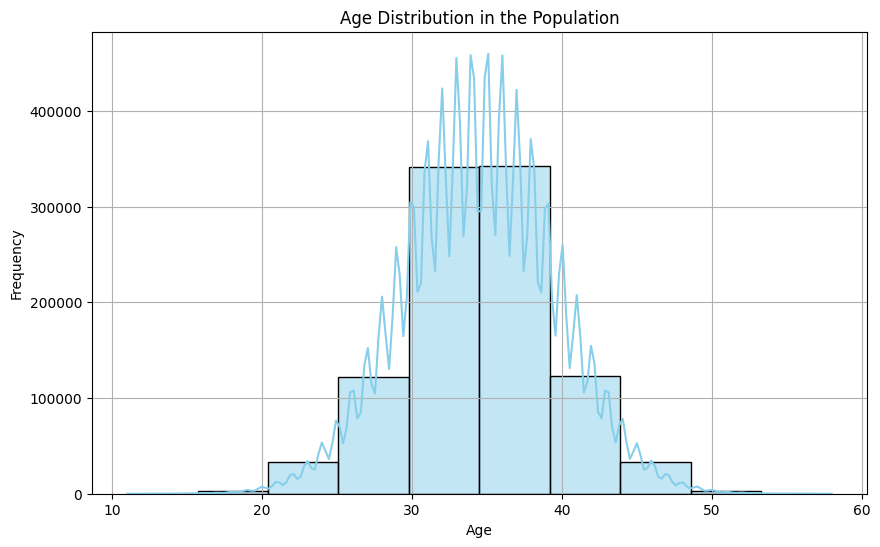

In [3]:
# Visualizing the histogram of the "Age" variable
plt.figure(figsize=(10, 6))
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution in the Population')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

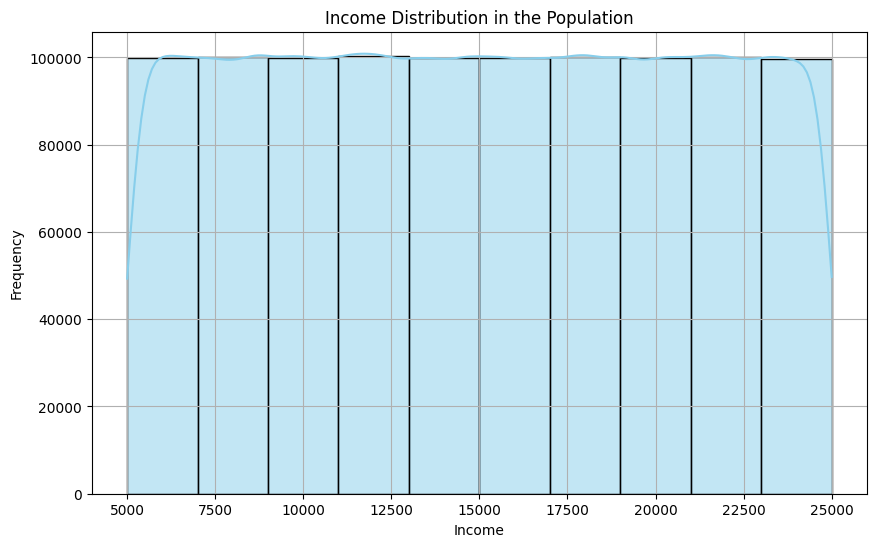

In [4]:
# Visualizing the histogram of the "Income" variable
plt.figure(figsize=(10, 6))
sns.histplot(population['Income'], bins=10, kde=True, color='skyblue')
plt.title('Income Distribution in the Population')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Realizando a análise estatística descritiva**

In [5]:
# Filtering only numeric columns
numeric_df = population.select_dtypes(include=[np.number])

# Calculating basic statistics
statistics_summary = numeric_df.describe().T

# Calculating additional statistics
statistics_summary['median'] = numeric_df.median()
statistics_summary['mode'] = numeric_df.mode().iloc[0]
statistics_summary['range'] = numeric_df.max() - numeric_df.min()
statistics_summary['cv'] = statistics_summary['std'] / statistics_summary['mean']  # Coefficient of variation
statistics_summary['skewness'] = numeric_df.apply(lambda x: skew(x.dropna()))
statistics_summary['kurtosis'] = numeric_df.apply(lambda x: kurtosis(x.dropna()))
statistics_summary['sem'] = numeric_df.sem()  # Standard error of the mean

# Calculating quartiles and interquartile range
quartiles = numeric_df.quantile([0.25, 0.75])
statistics_summary['Q1'] = quartiles.loc[0.25]
statistics_summary['Q3'] = quartiles.loc[0.75]
statistics_summary['IQR'] = statistics_summary['Q3'] - statistics_summary['Q1']

# Displaying the statistical summary
statistics_summary = statistics_summary[['count', 'mean', 'std', 'median', 'mode', 'min', 'max', 'range', 'Q1', 'Q3', 'IQR', 'cv', 'skewness', 'kurtosis', 'sem']]

# Formatting all columns to display two decimal places
statistics_summary = statistics_summary.applymap(lambda x: f"{x:.2f}")

# Showing the statistical summary
statistics_summary


/tmp/ipykernel_3328/840510647.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  statistics_summary = statistics_summary.applymap(lambda x: f"{x:.2f}")


,count,mean,std,median,mode,min,max,range,Q1,Q3,IQR,cv,skewness,kurtosis,sem
ID,1000000.00,500000.50,288675.28,500000.50,1.00,1.00,1000000.00,999999.00,250000.75,750000.25,499999.50,0.58,0.00,-1.20,288.68
Age,1000000.00,34.51,5.00,35.00,35.00,11.00,58.00,47.00,31.00,38.00,7.00,0.15,-0.00,0.00,0.01
Income,1000000.00,14996.82,5769.16,14995.00,6479.00,5000.00,24999.00,19999.00,10002.00,19996.00,9994.00,0.38,0.00,-1.20,5.77


In [6]:
# Simple Random Sampling
def simple_random_sampling(population, n):
    return population.sample(n)

# Example of using simple random sampling to select 1,000 individuals
# Here 'population' is the DataFrame containing the population data
random_sample = simple_random_sampling(population, 1000)
print("Simple Random Sampling:")
print(random_sample)


Simple Random Sampling:
            ID  Age  Gender  Income
403708  403709   37  Female   15421
691758  691759   28  Female   16846
150733  150734   42  Female   19880
102647  102648   40  Female   15693
99785    99786   39    Male   15445
...        ...  ...     ...     ...
517231  517232   37    Male   14154
509582  509583   23    Male    8072
464619  464620   33  Female   11532
430429  430430   38  Female   15881
920365  920366   33  Female   10763

[1000 rows x 4 columns]


**Checking the descriptive statistical parameters:**

In [11]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [8]:
# Displaying the descriptive statistics of the random sample
random_sample.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,1000.0,518386.523,278938.455764,956.0,294117.00,523912.0,744060.75,998753.0
Age,1000.0,34.508,4.883829,18.0,31.00,35.0,38.00,48.0
Income,1000.0,14852.256,5854.190387,5007.0,9770.25,14720.5,19940.50,24996.0


**Visualizing the histograms together**

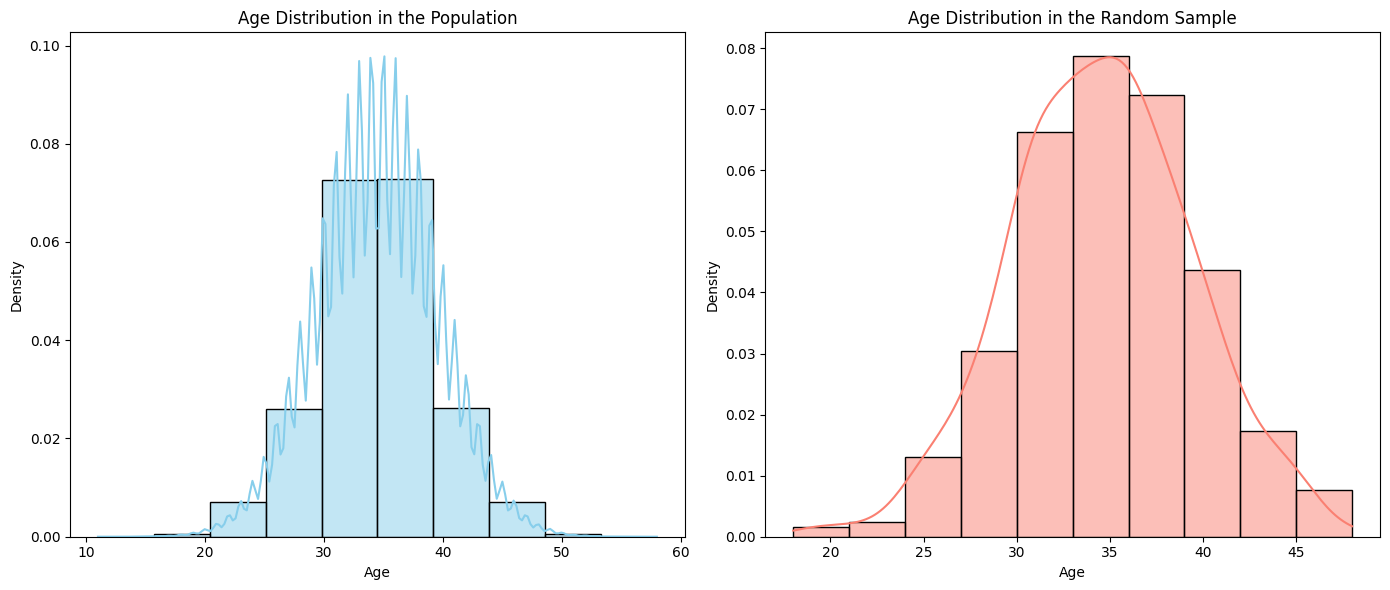

In [9]:
# Assuming 'population' and 'systematic_sample' are your DataFrames
# and the 'Age' columns are defined

# Setting the figure size
plt.figure(figsize=(14, 6))

# Plotting the histogram with density curve for the 'Age' column in the 'population' DataFrame
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue', edgecolor='black', stat='density')
plt.title('Age Distribution in the Population')
plt.xlabel('Age')
plt.ylabel('Density')

# Plotting the histogram with density curve for the 'Age' column in the 'random_sample' DataFrame
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.histplot(random_sample['Age'], bins=10, kde=True, color='salmon', edgecolor='black', stat='density')
plt.title('Age Distribution in the Random Sample')
plt.xlabel('Age')
plt.ylabel('Density')

# Adjusting the layout to avoid overlap
plt.tight_layout()

# Displaying the plots
plt.show()


In [10]:
# Stratified sampling by age
def stratified_sampling(population, n, stratification):
    
    sample = pd.DataFrame()  # Empty DataFrame to store the sample

    # Iterate over each stratum defined in the stratification dictionary
    for value, proportion in stratification.items():
        stratum = population[population['Age'] == value]  # Filter population by the current stratum (age group)

        # Check if the stratum contains any individuals
        if stratum.empty:
            print(f"There are no individuals in the population with age {value}.")
            print("Please modify the population or change the age.")
            return sample

        # Check if there are enough individuals in the current stratum for the sample
        if len(stratum) < int(n * proportion):
            print(f"There are not enough individuals in the population with age {value}.")
            return sample
        else:
            # Select a random sample from the current stratum
            stratum_sample = stratum.sample(int(n * proportion))
            sample = pd.concat([sample, stratum_sample])  # Concatenate the stratum sample to the overall sample

    return sample

# Example of using stratified sampling by age to select 100 individuals
age_stratification = {20: 0.2, 25: 0.3, 30: 0.2, 35: 0.1, 40: 0.2}  # Proportions for each age stratum
stratified_age_sample = stratified_sampling(population, 100, age_stratification)

print("\nStratified Sampling by Age:")
print(stratified_age_sample)



Stratified Sampling by Age:
            ID  Age  Gender  Income
824007  824008   20    Male   22964
204067  204068   20    Male    9128
467635  467636   20    Male    7935
476800  476801   20    Male   21760
806789  806790   20    Male   16154
...        ...  ...     ...     ...
493449  493450   40  Female   16089
212035  212036   40  Female   10105
338281  338282   40  Female   24331
189760  189761   40    Male   15329
216964  216965   40    Male   19000

[100 rows x 4 columns]


**Checking the descriptive statistical parameters of the sample:**

In [11]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.508727,5.004276,11.0,31.00,35.0,38.00,58.0
Income,1000000.0,14996.824744,5769.158074,5000.0,10002.00,14995.0,19996.00,24999.0


In [12]:
stratified_age_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,483403.86,280110.775672,13462.0,234320.75,467200.0,718446.75,998893.0
Age,100.0,29.00,7.035265,20.0,25.00,27.5,35.00,40.0
Income,100.0,15393.77,5769.277449,5309.0,10947.00,15371.0,20242.50,24861.0


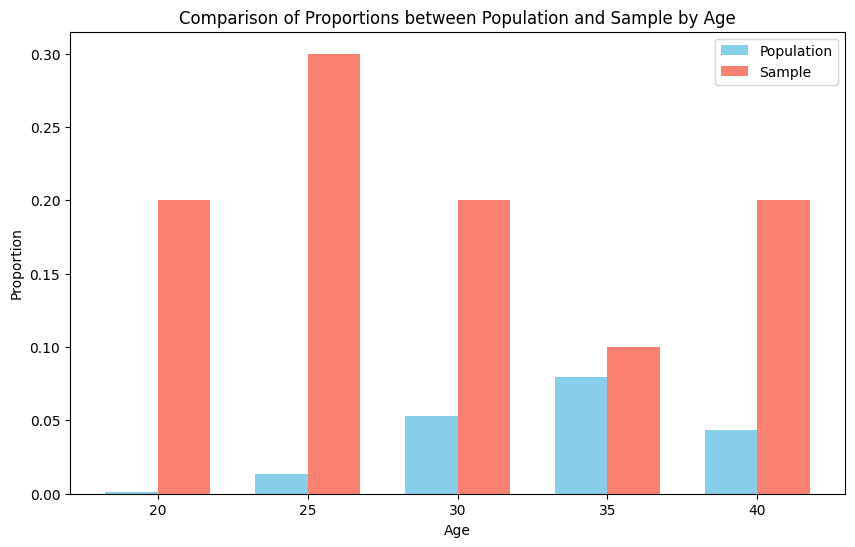

In [17]:
# Calculate proportions in the population
population_proportions = {age: len(population[population['Age'] == age]) / len(population) for age in age_stratification.keys()}

# Calculate proportions in the sample
sample_proportions = {age: len(stratified_age_sample[stratified_age_sample['Age'] == age]) / len(stratified_age_sample) for age in age_stratification.keys()}

# Ages and proportion values
ages = list(age_stratification.keys())
population_props = list(population_proportions.values())
sample_props = list(sample_proportions.values())

# Bar width
bar_width = 0.35

# Bar positions on the plot
positions = range(len(ages))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(positions, population_props, bar_width, label='Population', color='skyblue')
plt.bar([p + bar_width for p in positions], sample_props, bar_width, label='Sample', color='salmon')

# Labels and title
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Comparison of Proportions between Population and Sample by Age')
plt.xticks([p + bar_width / 2 for p in positions], ages)
plt.legend()

plt.show()

In [18]:
# Amostragem Sistemática
def systematic_sampling(population, n):
    k = len(population) // n  # Número de indivíduos em cada intervalo
    start = np.random.randint(0, k)  # Ponto de partida aleatório
    sampled_indices = np.arange(start, len(population), step=k)
    return population.iloc[sampled_indices]

# Exemplo de uso da amostragem sistemática para selecionar 100 indivíduos
systematic_sample = systematic_sampling(population, 100)
print("\nAmostragem Sistemática:")
print(systematic_sample)


Amostragem Sistemática:
            ID  Age  Gender  Income
6722      6723   40  Female    5715
16722    16723   32  Female    9975
26722    26723   22    Male    5660
36722    36723   32  Female   20273
46722    46723   32  Female   21502
...        ...  ...     ...     ...
956722  956723   28  Female   23169
966722  966723   38  Female    5338
976722  976723   37    Male    8769
986722  986723   34    Male    6651
996722  996723   33    Male   12701

[100 rows x 4 columns]


**Verificando os parâmetros estatísticos descritivos da amostra:**

In [19]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [20]:
systematic_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,501723.00,290114.919759,6723.0,254223.00,501723.0,749223.0,996723.0
Age,100.0,33.80,4.978743,22.0,32.00,34.0,37.0,52.0
Income,100.0,15180.21,5950.748148,5234.0,9808.25,15395.0,20301.5,24910.0


**Visualizando os histogramas juntos:**

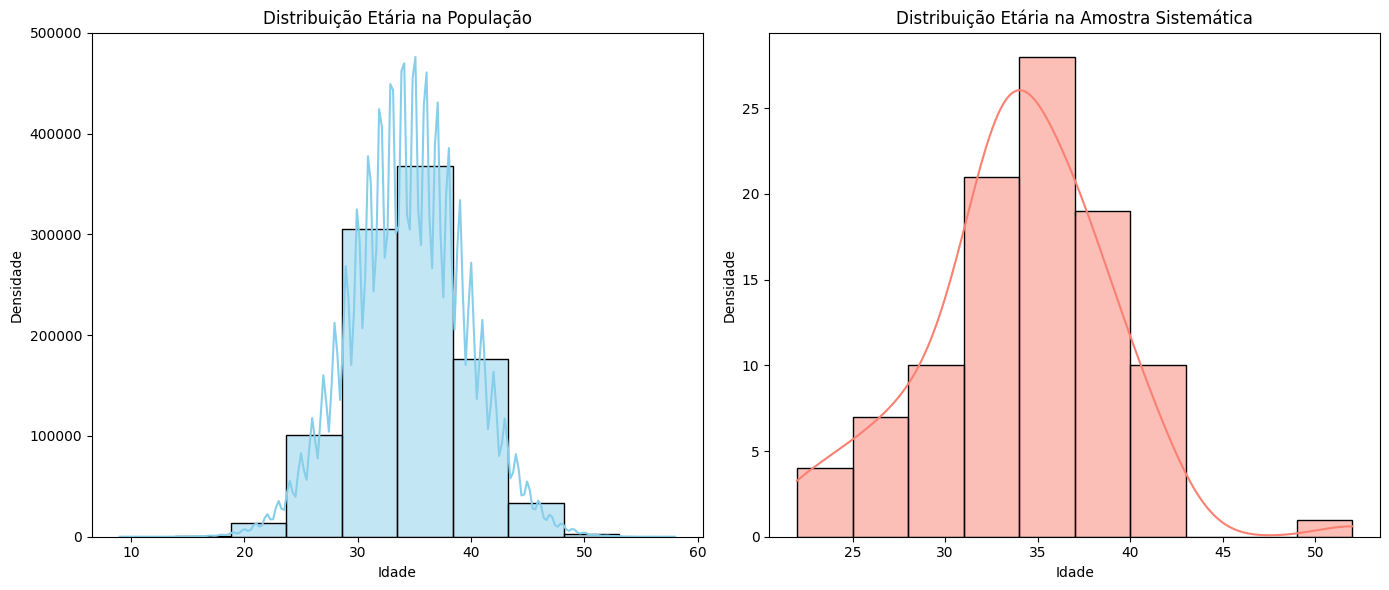

In [21]:
# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(systematic_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostra Sistemática')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

In [22]:
# Função para realizar a amostragem por conglomerados
def cluster_sampling(population, n, num_clusters):
    
    # Dividir a população em 'num_clusters' conglomerados
    clusters = np.array_split(population, num_clusters)

    # Selecionar aleatoriamente um indivíduo de cada conglomerado
    sampled_clusters = [cluster.sample(1) for cluster in clusters]

    # Concatenar os indivíduos selecionados de todos os conglomerados
    sample = pd.concat(sampled_clusters, axis=0)

    # Retornar os primeiros 'n' indivíduos da amostra
    return sample.head(n)

# Exemplo de uso da amostragem por conglomerados para selecionar 100 indivíduos
cluster_sample = cluster_sampling(population, 100, 5)

print("\nAmostragem por Conglomerados:")
print(cluster_sample)


Amostragem por Conglomerados:
            ID  Age  Gender  Income
75348    75349   32  Female   12500
354840  354841   35    Male   14555
574301  574302   32  Female   18322
789528  789529   41    Male   16795
825704  825705   35  Female   17575


/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


**Verificando os parâmetros estatísticos descritivos da amostra**

In [23]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [24]:
cluster_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5.0,523945.2,313832.885521,75349.0,354841.0,574302.0,789529.0,825705.0
Age,5.0,35.0,3.674235,32.0,32.0,35.0,35.0,41.0
Income,5.0,15949.4,2389.014295,12500.0,14555.0,16795.0,17575.0,18322.0


**Visualizando os histogramas juntos:**

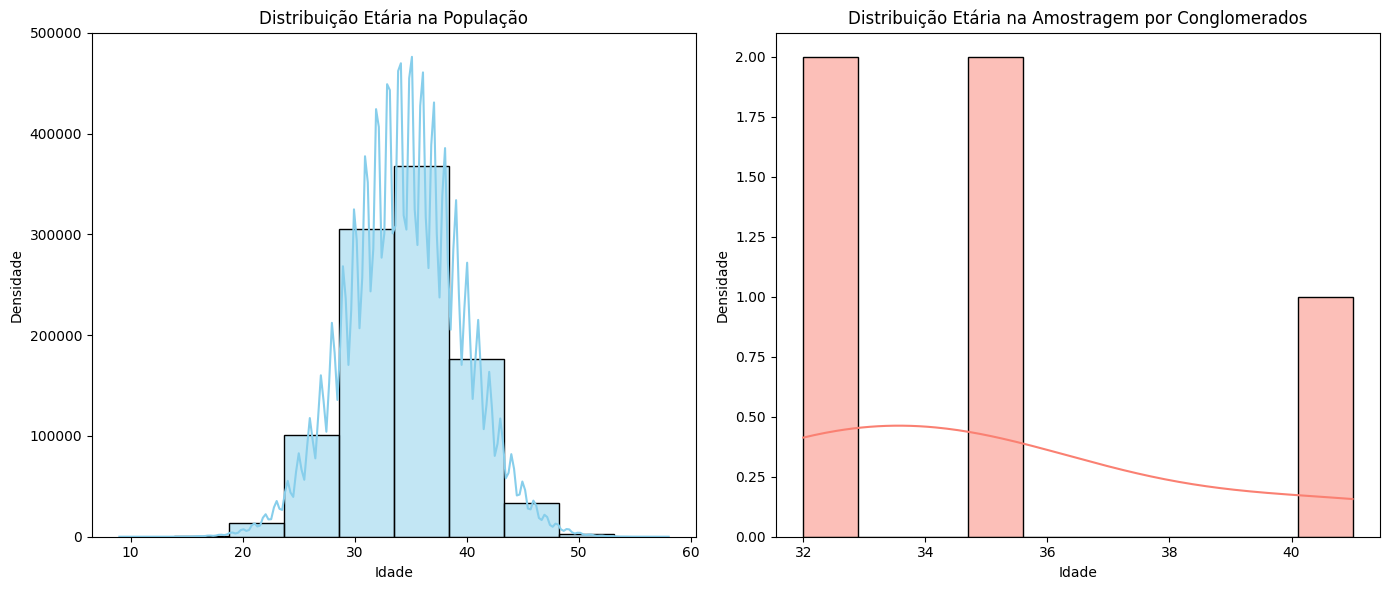

In [25]:
# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(cluster_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Conglomerados')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

In [26]:
# Amostragem por Cotas
def quota_sampling(population, quotas):
    """
    Realiza a amostragem por cotas da população.

    Parâmetros:
    population (DataFrame): O DataFrame que contém todos os indivíduos da população.
    quotas (dict): Um dicionário onde as chaves são atributos (colunas) e os valores são os critérios para as cotas.

    Exemplo de dicionário de cotas:
    {'Gender': 'Male', 'Age': 30}

    Retorna:
    DataFrame: Uma amostra contendo indivíduos que atendem às cotas especificadas.
    """
    # Cria um DataFrame vazio para armazenar a amostra
    sample = pd.DataFrame()

    # Itera sobre cada atributo e valor especificado nas cotas
    for attribute, value in quotas.items():
        # Filtra a população para obter o subconjunto que atende à cota atual
        subset = population[population[attribute] == value]

        # Seleciona aleatoriamente 50% dos casos do subconjunto para a amostra de maneira a atender o critério estabelecido
        # Note que `frac=0.5` indica a seleção de 50% dos casos
        sample = pd.concat([sample, subset.sample(frac=0.5)])

    return sample

# Exemplo de uso da amostragem por cotas para selecionar indivíduos
selected_quotas = {'Gender': 'Male', 'Age': 30}  # Exemplo de cotas selecionadas (critério)
quota_sample = quota_sampling(population, selected_quotas)

print("\nAmostragem por Cotas:")
print(quota_sample)


Amostragem por Cotas:
            ID  Age  Gender  Income
382465  382466   35    Male   19884
136738  136739   33    Male   21794
267030  267031   39    Male    9544
193372  193373   36    Male   22403
118308  118309   23    Male   18476
...        ...  ...     ...     ...
597106  597107   30  Female   12461
486385  486386   30  Female   10356
34633    34634   30    Male   19607
623422  623423   30  Female   12132
674102  674103   30  Female   24196

[276555 rows x 4 columns]


**Verificando os parâmetros estatísticos descritivos da amostra**

In [27]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [28]:
quota_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,276555.0,500319.421591,288495.585735,7.0,251454.0,500320.0,750122.5,999999.0
Age,276555.0,34.082515,4.945932,12.0,30.0,34.0,37.0,58.0
Income,276555.0,15006.986784,5769.766316,5000.0,10013.0,15002.0,19992.0,24999.0


**Visualizando os histogramas juntos**

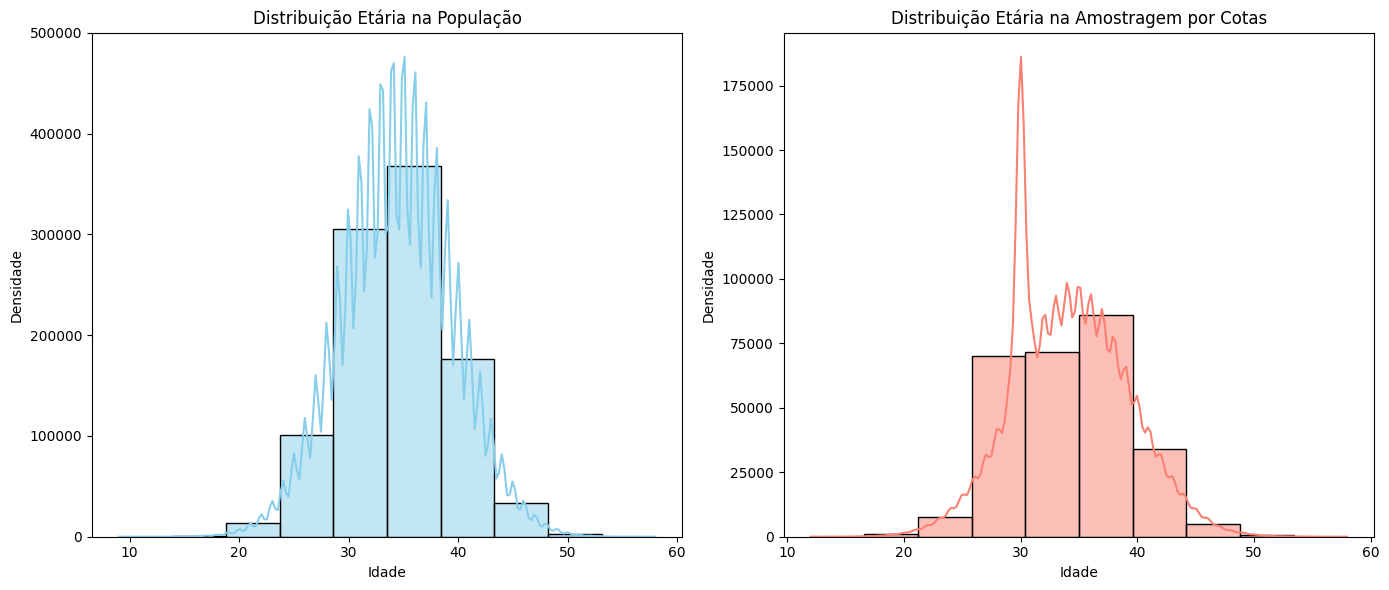

In [29]:
# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(quota_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Cotas')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

**Limitando a quantidade de amostra**

In [30]:
def quota_sampling(population, quotas, frac=0.5, max_sample_size=100):

    sample = pd.DataFrame()  # Cria um DataFrame vazio para armazenar a amostra

    for attribute, value in quotas.items():
        # Filtra a população para obter o subconjunto que atende à cota atual
        subset = population[population[attribute] == value]

        if not subset.empty:
            # Seleciona uma fração dos casos do subconjunto, respeitando a fração especificada
            sample = pd.concat([sample, subset.sample(frac=frac)])

    # Remove duplicatas para garantir que cada indivíduo apareça apenas uma vez
    sample = sample.drop_duplicates()

    # Limita a amostra ao tamanho máximo especificado
    if len(sample) > max_sample_size:
        sample = sample.sample(n=max_sample_size)

    return sample

# Exemplo de uso da amostragem por cotas para selecionar até 100 indivíduos, com uma fração de 50%
selected_quotas = {'Gender': 'Male', 'Age': 30}  # Exemplo de cotas selecionadas
quota_sample = quota_sampling(population, selected_quotas, frac=0.5, max_sample_size=100)

print("\nAmostragem por Cotas:")
print(quota_sample)


Amostragem por Cotas:
            ID  Age Gender  Income
529985  529986   33   Male   19908
898127  898128   36   Male    7104
53158    53159   35   Male    9488
292154  292155   29   Male    7606
596977  596978   37   Male    9200
...        ...  ...    ...     ...
621473  621474   40   Male   23626
547034  547035   29   Male   16102
454016  454017   35   Male   14163
161220  161221   32   Male    9026
632958  632959   21   Male   24192

[100 rows x 4 columns]


**Verificando os parâmetros estatísticos descritivos da amostra**

In [31]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [32]:
quota_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,543625.41,284434.180133,3092.0,296395.25,584190.0,781609.0,994915.0
Age,100.0,33.82,5.023943,21.0,30.00,33.5,37.0,49.0
Income,100.0,14191.86,6019.050350,5015.0,8948.75,13899.5,19249.5,24808.0


**Visualizando os histogramas juntos**

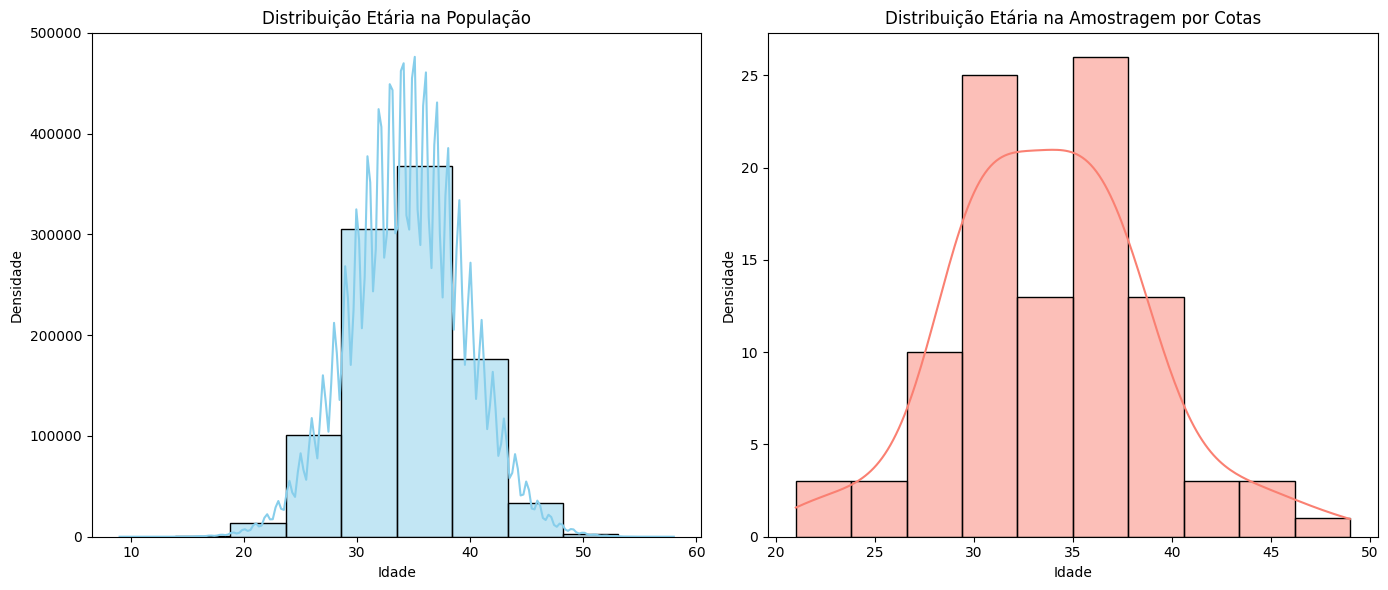

In [33]:
# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(quota_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Cotas')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

In [34]:
# Amostragem por Conveniência
def convenience_sampling(population, n):

    # Seleciona aleatoriamente 'n' indivíduos da população
    return population.sample(n)

# Exemplo de uso da amostragem por conveniência para selecionar 100 indivíduos
convenience_sample = convenience_sampling(population, 100)

print("\nAmostragem por Conveniência:")
print(convenience_sample)


Amostragem por Conveniência:
            ID  Age  Gender  Income
163818  163819   26  Female   10874
830132  830133   40  Female    6757
369643  369644   37    Male   22136
235539  235540   41    Male   14355
907481  907482   34    Male   23901
...        ...  ...     ...     ...
684795  684796   35  Female   14628
525024  525025   37    Male    7515
154054  154055   33    Male    5827
624090  624091   36  Female    5218
861137  861138   29  Female    9309

[100 rows x 4 columns]


**Verificando os parâmetros estatísticos descritivos da amostra**

In [35]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [36]:
convenience_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,516760.98,277672.765211,7989.0,289814.75,543184.5,768574.5,976884.0
Age,100.0,34.34,4.110150,24.0,31.00,34.0,37.0,44.0
Income,100.0,14039.01,5884.699399,5023.0,9292.50,13143.0,19315.5,24671.0


**Visualizando os histogramas juntos:**

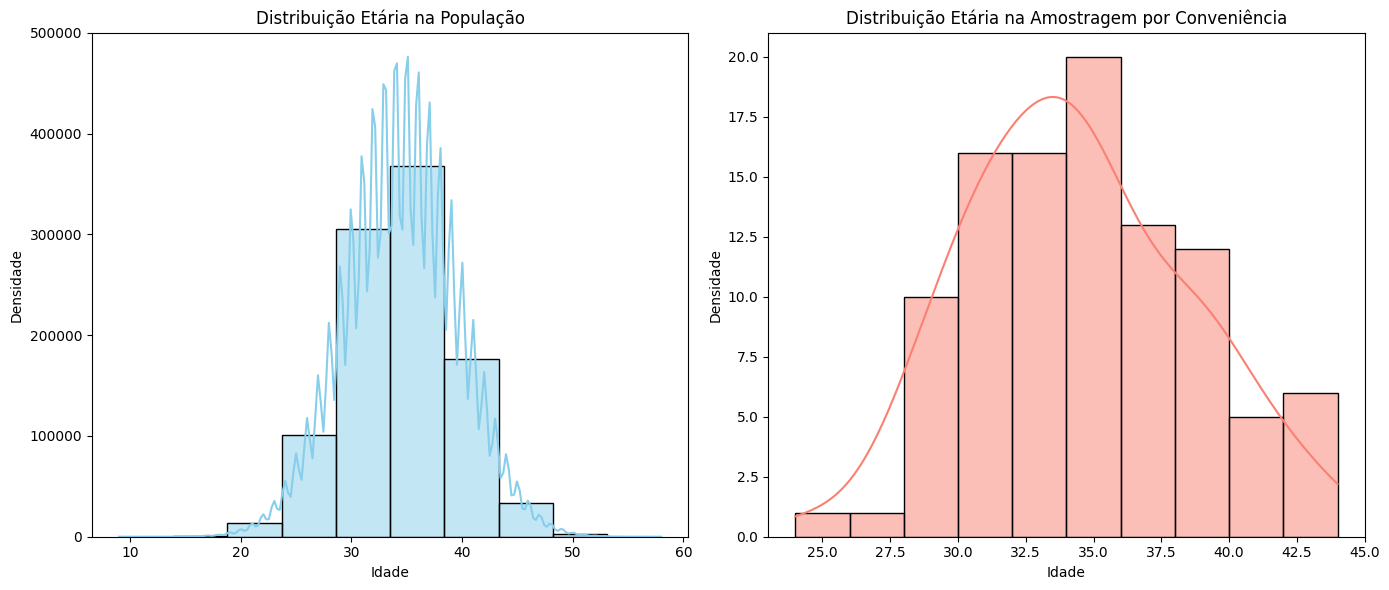

In [37]:
# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra sistemática
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(convenience_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Conveniência')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

In [38]:
# Dataset, coluna 'Gender' com os valores 'Male' para homens e 'Female' para mulheres


# Contagem de homens e mulheres no dataset original
total_male = len(population[population['Gender'] == 'Male'])
total_female = len(population[population['Gender'] == 'Female'])

# Definindo o tamanho da amostra
sample_size = 100

# Calculando a proporção de homens e mulheres na amostra
male_sample_size = int((total_male / len(population)) * sample_size)
female_sample_size = sample_size - male_sample_size

# Realizando a amostragem aleatória mantendo a proporção
male_sample = population[population['Gender'] == 'Male'].sample(n=male_sample_size, random_state=42)
female_sample = population[population['Gender'] == 'Female'].sample(n=female_sample_size, random_state=42)

# Concatenando as amostras
final_sample = pd.concat([male_sample, female_sample])

# Embaralhando os dados para misturar homens e mulheres
final_sample = final_sample.sample(frac=1, random_state=42).reset_index(drop=True)

print(final_sample)

        ID  Age  Gender  Income
0   591601   37  Female   11968
1   462490   34  Female    7556
2   734412   32  Female   20110
3     2964   27    Male    8909
4    15917   33    Male    7426
..     ...  ...     ...     ...
95  965419   31  Female   10902
96  183499   24  Female   19963
97   28503   31    Male   12805
98  886346   36  Female   19923
99  711685   42  Female    8333

[100 rows x 4 columns]


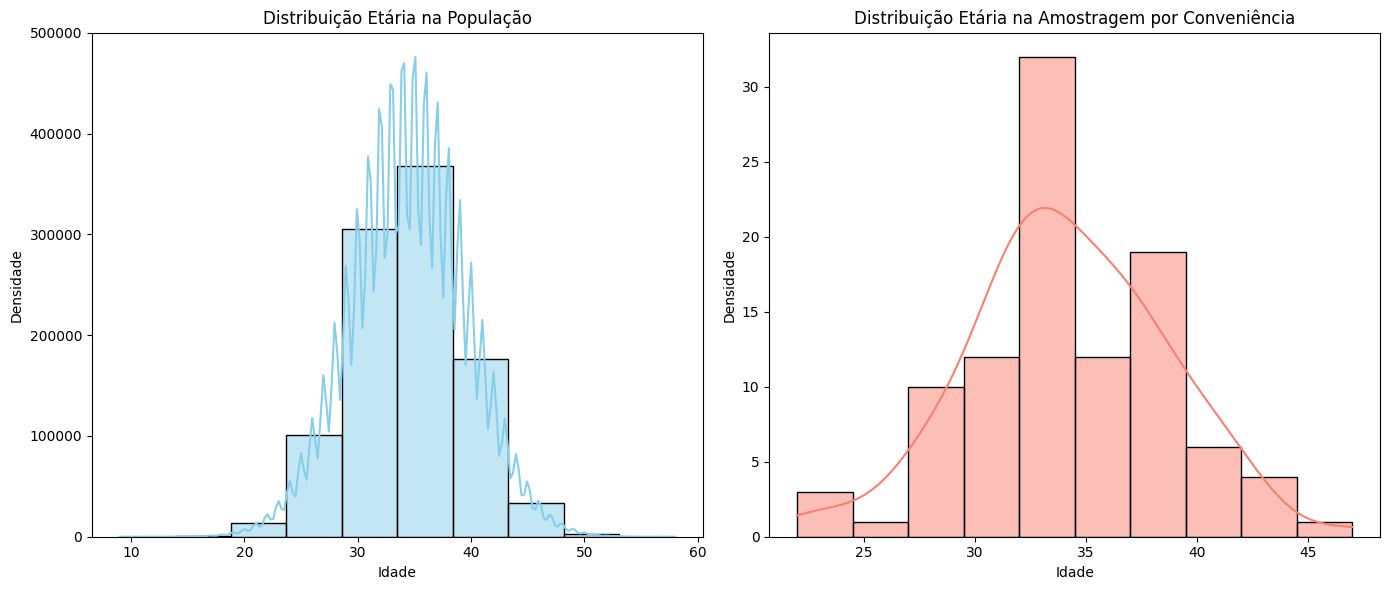

In [39]:
# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra sistemática
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(final_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Conveniência')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()